[오늘코드](https://www.inflearn.com/course/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-kaggle#) 강의와 [EDA & Ensemble Model](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/comments) 커널을 참고하여 캐글 입문 코드를 작성해봤습니다.

### 목차
1. Package & Data 패키지 및 데이터 준비
2. Data summary 데이터 요약
3. Feature Engineering(1)
    1. 날짜 세분화
    2. workingday와 holiday 관계
4. EDA 탐색적 데이터 분석
    1. Missing value 결측치
    2. Outliers 이상치
        - IQR
    3. 분포의 왜도
        - 로그 변환
    4. Correlation 상관 분석
    5. Visualization Y(count) 비교 시각화

# 패키지 및 데이터 준비

In [5]:
### 패키지 및 설정 ###
import pandas as pd # DataFrame
import numpy as np # linear algebra
import seaborn as sns # visualization 
import matplotlib as mpl # visualization
import matplotlib.pyplot as plt #visualization
from scipy import stats # statistics
from datetime import datetime # datetime
import missingno as msno # missing values

# 그래프 설정
%matplotlib inline
plt.style.use('ggplot') #격자 그리기

# 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트 깨짐 문제
plt.rcParams['font.family'] = 'NanumSquareRound' #나눔스퀘어라운드 폰트 설정
plt.rcParams['font.size'] = 15 #폰트 크기 15
print('설정된 폰트 사이즈: ',plt.rcParams['font.size'])
print('설정된 폰트 글꼴: ',plt.rcParams['font.family'])

설정된 폰트 사이즈:  15.0
설정된 폰트 글꼴:  ['NanumSquareRound']


In [75]:
### 데이터 불러오기 ###
train = pd.read_csv('train.csv',parse_dates = ['datetime'])
test = pd.read_csv('test.csv',parse_dates = ['datetime'])

# 데이터 요약

- **shape**: train, test 데이터의 크기
- **head**: 구체적인 train 데이터의 형태
- **info**: train,test 데이터의 칼럼별 데이터 형식과 결측값(null) 개수 탐색
    - **columns**: 칼럼명만 확인
    - **dtype**: 칼럼별 데이터 형식만 확인
- **describe**: 양적 변수의 기술통계 요약

In [14]:
### shape ###
print(f'train:{train.shape},test:{test.shape}')

train:(10886, 12),test:(6493, 9)


In [8]:
### sample 3 ###
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [10]:
### Data type ###
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [12]:
### describe 기술통계 ###
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Feature Engineering(1)
### 날짜 세분화

In [76]:
# datetime 형식이라 가능한 연산
train['year'] = train['datetime'].dt.year #연도
train['month'] = train['datetime'].dt.month #월
train['day'] = train['datetime'].dt.day #일
train['hour'] = train['datetime'].dt.hour #시간
train['minute'] = train['datetime'].dt.minute #분
train['second'] = train['datetime'].dt.second #초
train['dayofweek'] = train['datetime'].dt.dayofweek #요일

train = train.drop(['datetime'],axis=1)

In [77]:
# new columns 생성 이후 train info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  minute      10886 non-null  int64  
 16  second      10886 non-null  int64  
 17  dayofweek   10886 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 1.5 MB


In [107]:
### year-month 추가 ###
def f_year_month(data):
    y = data['year'].apply(str)
    m = data['month'].apply(str)
    y_m = [y[i]+'-'+m[i] for i in range(data.shape[0])]
    
    return y_m

train['year_month'] = f_year_month(train)

### workingday와 holiday 관계

In [82]:
### workingday가 아니면 holiday인가?
print(train.workingday.sum()+train.holiday.sum())
print(train.day.value_counts().sum())

7723
10886


- workingday는 holiday와 weekend를 제외한 날짜
- holiday+workingday = day가 아니다

# EDA 탐색적 데이터 분석
### 결측치

In [15]:
# 결측치 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

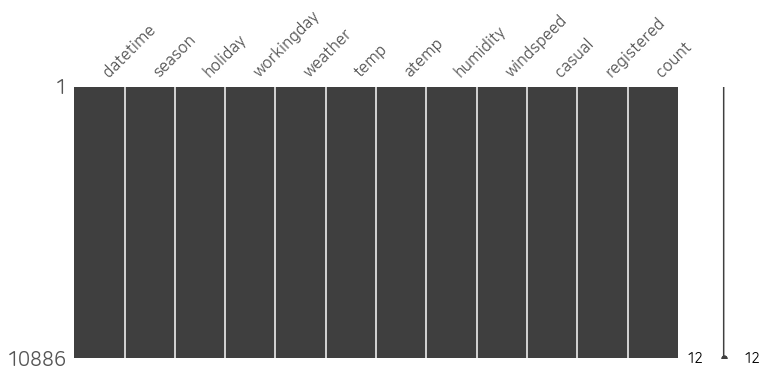

In [16]:
# 결측치 시각화
msno.matrix(train, figsize=(12,5))

`Null` 값은 없는 것으로 보임. But, 관측되지 않은 값을 0으로 입력했을 수 있다.
-> 즉, **0으로 된 데이터를 어떻게 Feature Engineering 하느냐**에 따라 결과가 달라질 것

### 이상치

[Text(0.5, 1.0, '대여량')]

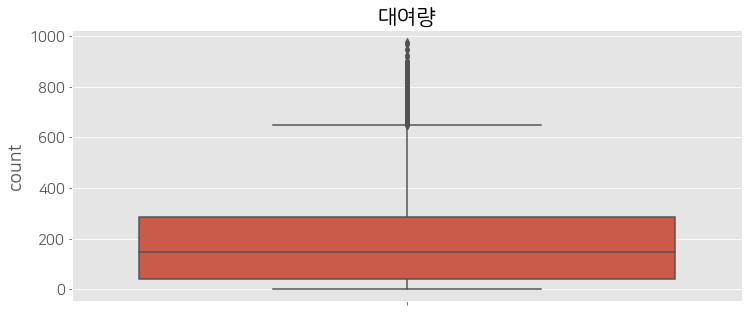

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

sns.boxplot(data = train, y='count', orient='v',ax=ax)
ax.set(title='대여량')

In [46]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

boxplot을 살펴보면 minimum 이하의 이상치는 없고, maximum 이상의 이상치만 존재한다. 

->따라서 **IQR**을 활용하여 이상치를 제거한다.

train:(10886, 19),train without Outliers:(10586, 19)
remove:300


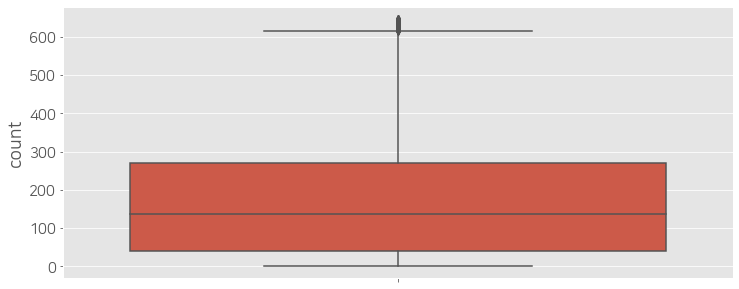

In [108]:
### IQR 범위 설정 ###
IQR=train['count'].quantile(q=0.75)-train['count'].quantile(q=0.25)
IQR_l=train['count'].quantile(q=0.25)-1.5*IQR
IQR_u=train['count'].quantile(q=0.75)+1.5*IQR

### remove outliers 이상치 제거 ###
train_Outliers = train[train['count']>=IQR_l]
train_Outliers = train_Outliers[train_Outliers['count']<=IQR_u]
print(f'train:{train.shape},train without Outliers:{train_Outliers.shape}')
print(f'remove:{train.shape[0]-train_Outliers.shape[0]}')

### 확인 ###
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

sns.boxplot(data = train_Outliers, y='count', orient='v',ax=ax)
#ax.set(title='대여량')

### 분포의 왜도

[Text(0.5, 1.0, '로그 대여량의 Q-Q plot')]

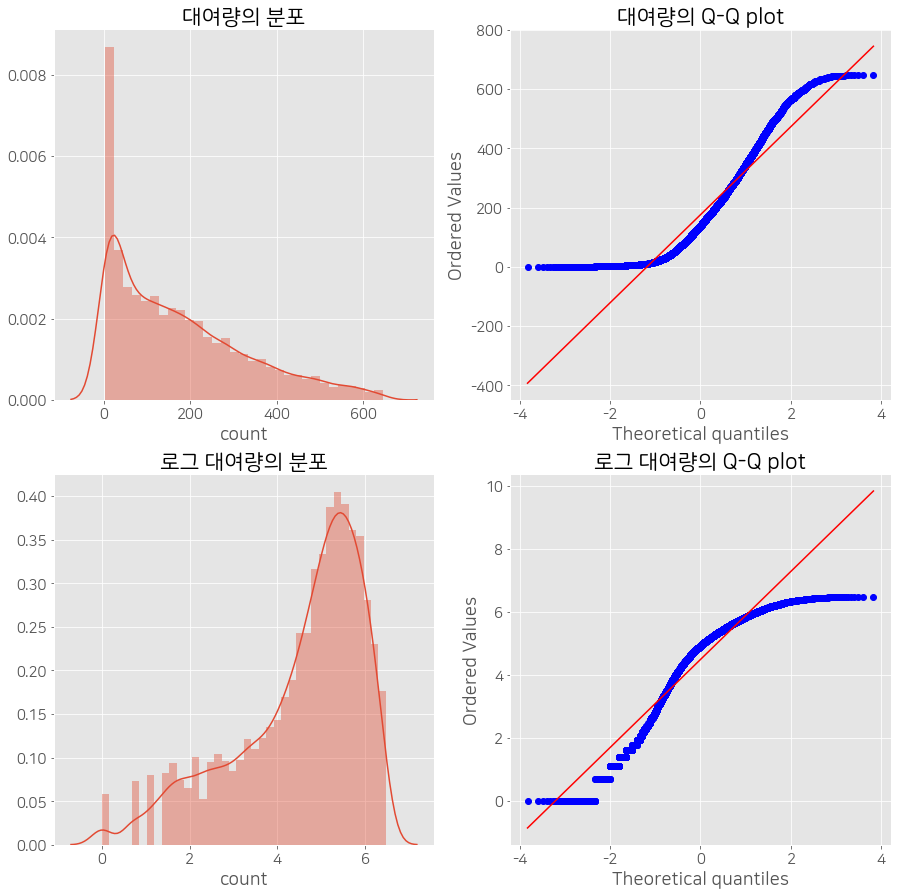

In [117]:
### 대여량(count) 데이터의 분포 확인 ###
fig, ax = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(15,15)

sns.distplot(train_Outliers['count'],ax=ax[0][0])
stats.probplot(train_Outliers['count'],dist='norm',fit=True,plot=ax[0][1])
sns.distplot(np.log(train_Outliers['count']),ax=ax[1][0])
stats.probplot(np.log(train_Outliers['count']),dist='norm',fit=True,plot=ax[1][1])

ax[0][0].set(title='대여량의 분포')
ax[0][1].set(title='대여량의 Q-Q plot')
ax[1][0].set(title='로그 대여량의 분포')
ax[1][1].set(title='로그 대여량의 Q-Q plot')

- 대여량의 분포가 전체적으로 왼쪽으로 기울어졌으며, **0**에 집중된 값이 많이 있음을 알 수 있다
- 대여량의 Q-Q plot를 토대로 약간의 normal형태를 띄고 있음을 알 수 있다. 하지만 normal분포를 띄기 위해 변환이 필요하다.
- 로그를 씌운 대여량의 분포는 오른쪽으로 치우쳐있으나 로그를 씌우기 전보다 정규분포와 더 가까워짐을 알 수 있다. 따라서, **로그 변환**을 사용하기로 한다.

In [122]:
### skewness 왜도 ###
train_Outliers.skew()

season        0.002771
holiday       5.594447
workingday   -0.754486
weather       1.231523
temp          0.031437
atemp        -0.075423
humidity     -0.101216
windspeed     0.591725
casual        2.432141
registered    1.087847
count         0.915584
year          0.048765
month         0.006737
day           0.005716
hour          0.017004
minute        0.000000
second        0.000000
dayofweek    -0.018793
log_count    -1.001577
dtype: float64

In [123]:
### kurtosis 첨도 ###
train_Outliers.kurt()

season        -1.368158
holiday       29.303372
workingday    -1.431021
weather        0.359994
temp          -0.905001
atemp         -0.845083
humidity      -0.747931
windspeed      0.632139
casual         6.943544
registered     0.822902
count          0.057123
year          -1.997999
month         -1.224635
day           -1.205497
hour          -1.205326
minute         0.000000
second         0.000000
dayofweek     -1.261748
log_count      0.250730
dtype: float64

In [118]:
### 로그 대여량(count) 생성 ###
train_Outliers['log_count'] = np.log(train_Outliers['count'])

### 상관분석
continuous(numeric)변수와 *count*의 상관관계

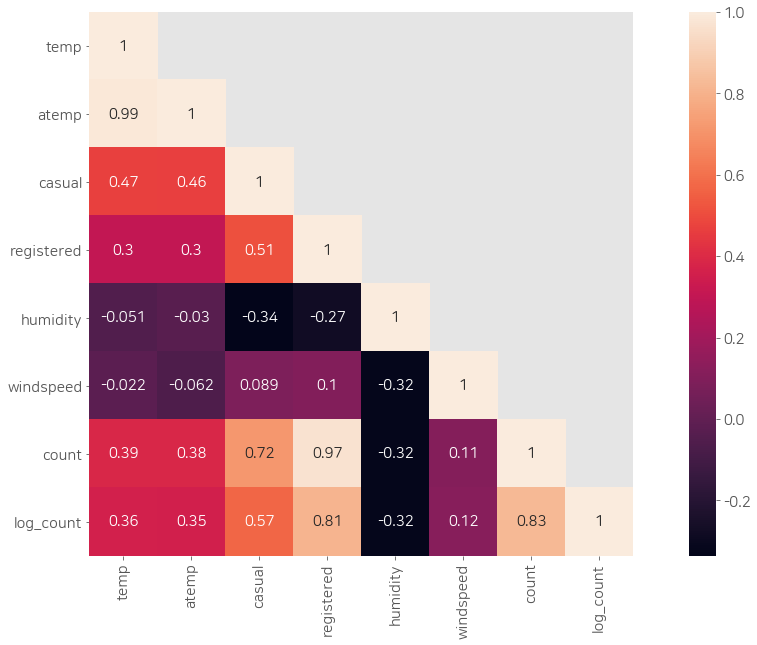

In [119]:
### 상관계수 행렬 ###
corrMatt = train_Outliers[['temp','atemp','casual','registered','humidity','windspeed','count','log_count']].corr()

### 시각화 ###
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax = plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corrMatt,mask=mask,square=True,annot=True,ax=ax)

- 온도(temp), 체감온도(atemp),습도(humidity), 풍속(windspeed)는 대여량(count)와 상관관계가 거의 없다
- **casual**과 **registered**는 대여량과 상관관계가 높으며, 그 중에서도 **registered**의 상관관계가 매우 높다. 하지만 두 변수는 <u>test에는 없다.</u>
- 온도(temp)와 체감온도(atemp)는 상관계수가 0.99로 매우 높은 상관관계를 가지며, 둘 다 피처로 사용하는 것은 적합하지 않을 수 있다.

- 로그를 씌운 대여량(count)와 casual, registered의 상관관계가 <u>로그를 씌우기 이전보다 낮다</u>

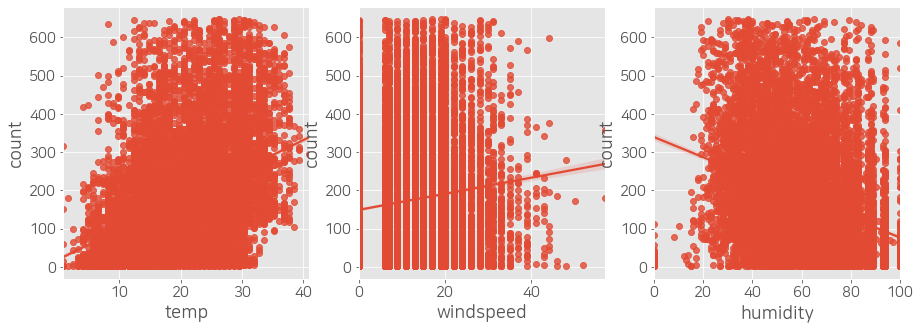

In [106]:
### 대여량(count)과 상관관계가 낮은 변수의 분포 확인 ###
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(15,5)

sns.regplot(data=train_Outliers,x='temp',y='count',ax=ax1)
sns.regplot(data=train_Outliers,x='windspeed',y='count',ax=ax2)
sns.regplot(data=train_Outliers,x='humidity',y='count',ax=ax3)

- **풍속(windspeed)**의 값의 일부가 0에 집중된 것을 확인할 수 있다

### Y(count) 비교 시각화

[Text(0.5, 1.0, '시간별 대여량')]

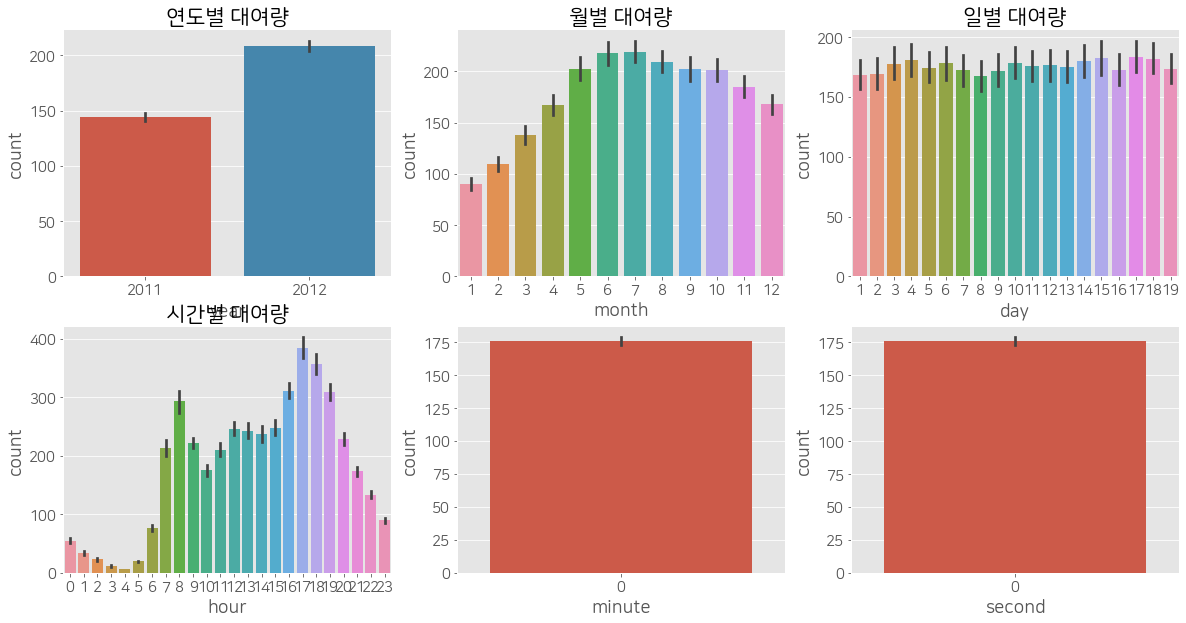

In [72]:
### 시간 변수 ###
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,10)

sns.barplot(data=train_Outliers,x='year',y='count',ax=ax1)
sns.barplot(data=train_Outliers,x='month',y='count',ax=ax2)
sns.barplot(data=train_Outliers,x='day',y='count',ax=ax3)
sns.barplot(data=train_Outliers,x='hour',y='count',ax=ax4)
sns.barplot(data=train_Outliers,x='minute',y='count',ax=ax5)
sns.barplot(data=train_Outliers,x='second',y='count',ax=ax6)

ax1.set(title = '연도별 대여량')
ax2.set(title = '월별 대여량')
ax3.set(title = '일별 대여량')
ax4.set(title = '시간별 대여량')

- **연도별 대여량**: 2011년 대비 2012년의 자전거 대여량이 더 많다

- **월별 대여량**: 1월의 대여량이 가장 낮으며 10월부터 대여량이 감소하고 1월부터 6월까지 다시 증가한다
    - 기온이 낮아지는 10월 이후에 대여량이 감소하는 것으로 보아 <u>**날씨**와 연관이 있음</u>을 짐작할 수 있다

- **일별 대여량**: 일별 대여량에 큰 차이가 나타나지 않는다
    - 1일-19일 데이터만 train에 존재, 나머지는 test에 존재(**삭제**)

- **시간별 대여량**:8시의 대여량이 급증하며 이후 감소하다가 다시 17시-18시(오후 5시-6시) 사이에 증가한다.
    - <u>**출근**시간과 **퇴근**시간대의 대여량이 증가<u/>하는 것을 확인할 수 있다
- **분, 초**: 분과 초에 따른 대여량 변화는 관찰되지 않는다(**삭제**)

[Text(0.5, 1.0, '요일별 대여량')]

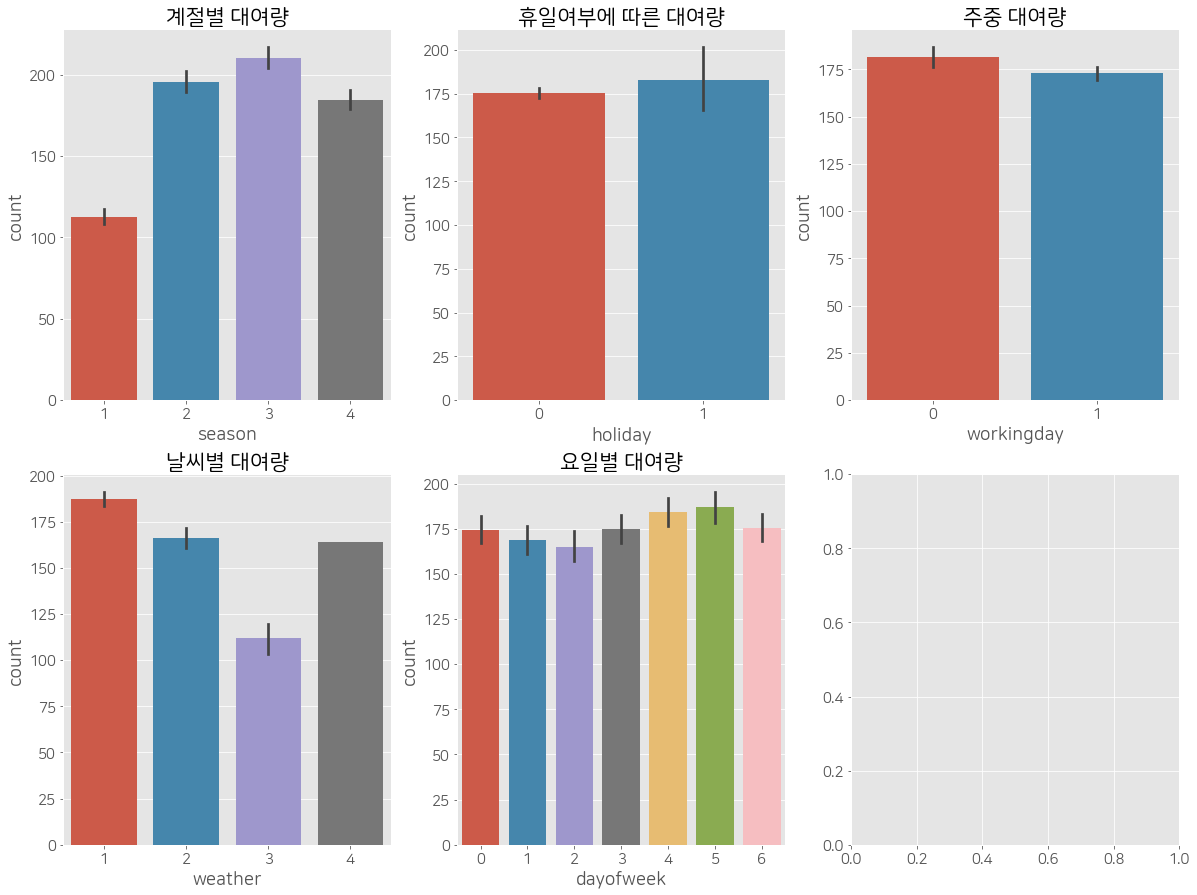

In [87]:
### 기타 categorical 변수 ###
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,15)

sns.barplot(data=train_Outliers,x='season',y='count',ax=ax1)
sns.barplot(data=train_Outliers,x='holiday',y='count',ax=ax2)
sns.barplot(data=train_Outliers,x='workingday',y='count',ax=ax3)
sns.barplot(data=train_Outliers,x='weather',y='count',ax=ax4)
sns.barplot(data=train_Outliers,x='dayofweek',y='count',ax=ax5)

ax1.set(title='계절별 대여량')
ax2.set(title='휴일여부에 따른 대여량')
ax3.set(title='주중 대여량')
ax4.set(title='날씨별 대여량')
ax5.set(title='요일별 대여량')

- **계절별 대여량**: 봄의 대여량이 가장 낮고 가을의 대여량이 가장 높다
- **휴일여부에 따른 대여량**: 휴일 여부에 따른 대여량의 차이는 크지 않다
- **주중 대여량**: 휴일과 주말을 제외한 주중 대여량의 차이도 크지 않다
- **날씨별 대여량**: 약간의 눈이나 비가 오는 날씨의 대여량이 급격히 낮은 것을 확인할 수 있다. 급격한 날씨변화가 없이 평온한 날의 대여량이 가장 높다.
- **요일별 대여량**: 요일별 대여량의 차이가 크지 않지만, 수요일의 대여량이 가장 낮으며 토요일의 대여량이 가장 높다

[Text(0.5, 1.0, '시간별 대여량 변화')]

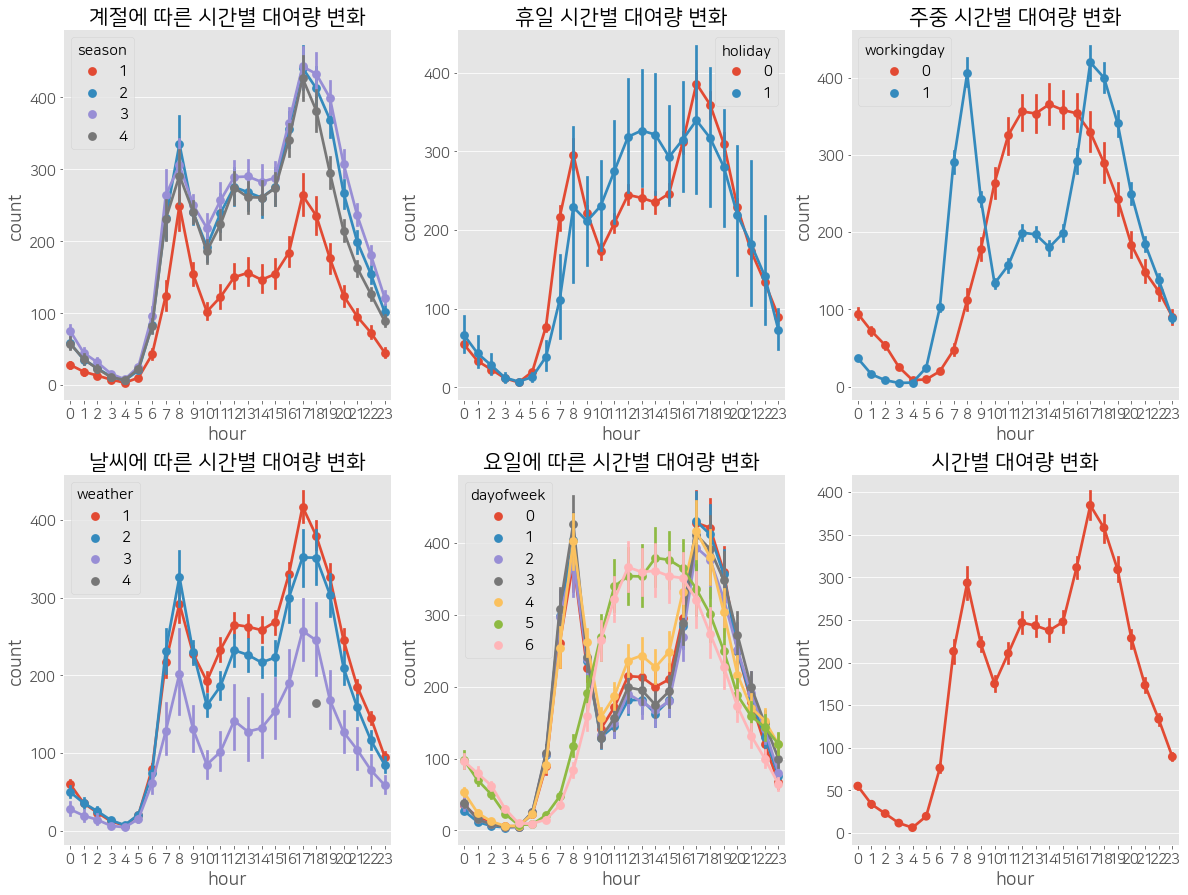

In [89]:
### 시간에 따른 대여량 비교 ###
### 기타 categorical 변수 ###
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,15)

sns.pointplot(data=train_Outliers,x='hour',hue='season',y='count',ax=ax1)
sns.pointplot(data=train_Outliers,x='hour',hue='holiday',y='count',ax=ax2)
sns.pointplot(data=train_Outliers,x='hour',hue='workingday',y='count',ax=ax3)
sns.pointplot(data=train_Outliers,x='hour',hue='weather',y='count',ax=ax4)
sns.pointplot(data=train_Outliers,x='hour',hue='dayofweek',y='count',ax=ax5)
sns.pointplot(data=train_Outliers,x='hour',y='count',ax=ax6)

ax1.set(title='계절에 따른 시간별 대여량 변화')
ax2.set(title='휴일 시간별 대여량 변화')
ax3.set(title='주중 시간별 대여량 변화')
ax4.set(title='날씨에 따른 시간별 대여량 변화')
ax5.set(title='요일에 따른 시간별 대여량 변화')
ax6.set(title='시간별 대여량 변화')

- **시간별 대여량 변화**: 오전에는 7시-8시 사이에 급증하며 오후에는 17시-18시 사이에 급증한다. 즉, 출근시간대와 퇴근시간대에 대여량이 늘어남을 알 수 있다
    - **계절에 따른 시간별 대여량 변화**: 계절구분과 관계없이 시간별 대여량 변화의 분포는 일정한 것을 알 수 있다.(계절은 시간과 상관관계가 적다)
    - **휴일 시간별 대여량 변화**: 휴일이 아닌 날의 시간별 대여량 변화는 출퇴근 시간대 급증하는 공통된 양상을 보이지만, 휴일에 해당하는 날의 분포는 약간의 차이가 있음을 알 수 있다. 휴일의 대여량 분포는 주로 **오후 시간대**에 증가하는 것을 확인할 수 있다
    - **주중 시간별 대여량 변화**: 주중에 해당하는 날짜의 시간별 대여량 변화는 출퇴근 시간대에 급증하는 양상을 보인다. 하지만 <u>휴일, 주말</u>의 경우에는 오전10시부터 오후5시(17시)까지 대여량이 증가하는 양상을 보인다. 즉, 쉬는 날에는 **오후**에 대여량이 많아지는 것을 알 수 있다
    - **날씨에 따른 시간별 대여량 변화**: 날씨에 따라 대여량의 차이가 존재하지만 분포의 큰 차이는 없다. 출퇴근 시간에 급증하는 공통적 양상을 보인다.
    - **요일에 따른 시간별 대여량 변화**: 주중에 해당하는 월-금요일의 분포는 주중의 시간별 분포과 같이 출퇴근 시간대에 급증하는 양상을 보인다. 하지만 <u>토,일요일</u>의 분포는 주말과 휴일에 해당하는 분포와 비슷한 양상을 보인다.

[Text(0.5, 1.0, '월별 대여량 변화')]

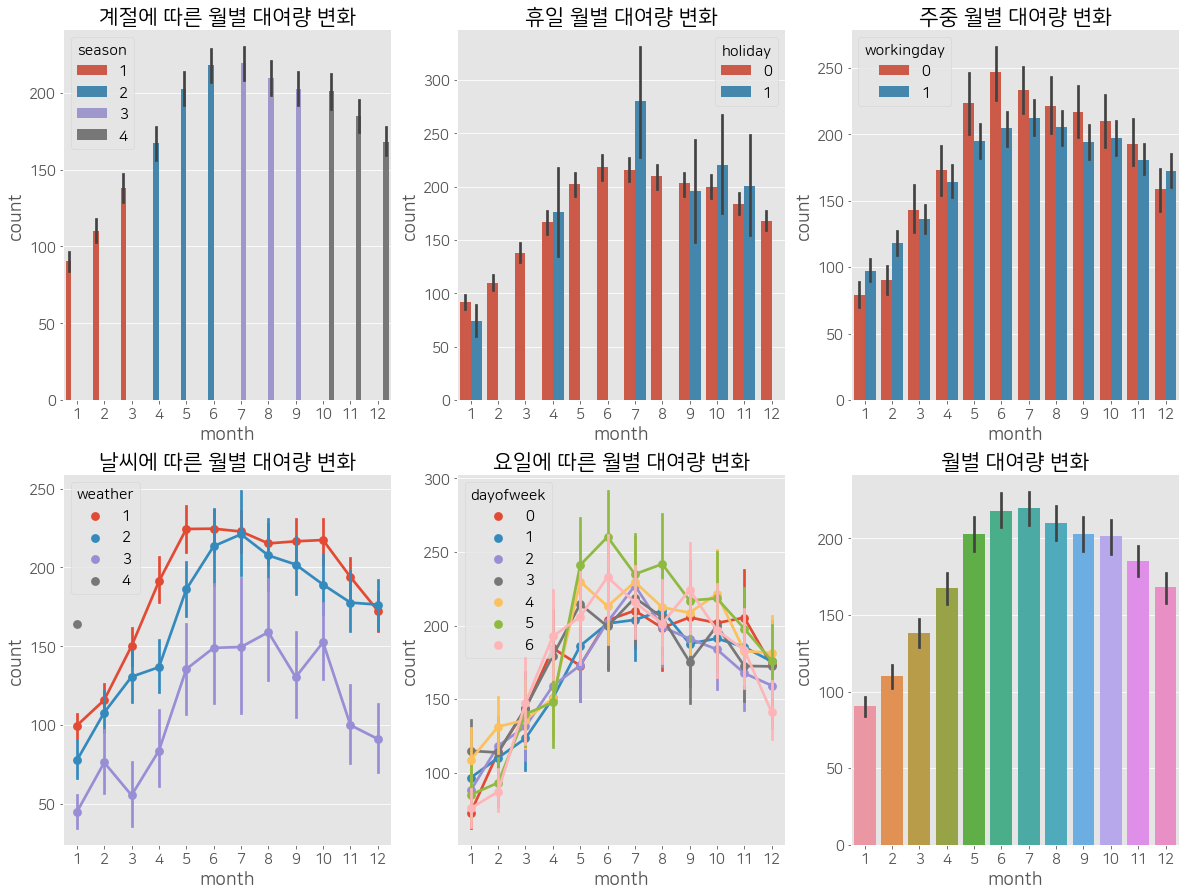

In [92]:
### 월별 대여량 비교 ###
### 기타 categorical 변수 ###
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,15)

sns.barplot(data=train_Outliers,x='month',hue='season',y='count',ax=ax1)
sns.barplot(data=train_Outliers,x='month',hue='holiday',y='count',ax=ax2)
sns.barplot(data=train_Outliers,x='month',hue='workingday',y='count',ax=ax3)
sns.pointplot(data=train_Outliers,x='month',hue='weather',y='count',ax=ax4)
sns.pointplot(data=train_Outliers,x='month',hue='dayofweek',y='count',ax=ax5)
sns.barplot(data=train_Outliers,x='month',y='count',ax=ax6)

ax1.set(title='계절에 따른 월별 대여량 변화')
ax2.set(title='휴일 월별 대여량 변화')
ax3.set(title='주중 월별 대여량 변화')
ax4.set(title='날씨에 따른 월별 대여량 변화')
ax5.set(title='요일에 따른 월별 대여량 변화')
ax6.set(title='월별 대여량 변화')

- **월별 대여량 변화**: 11월부터 1월까지 대여량이 감소하며 1월부터 서서히 대여량이 증가한다. 날씨가 비교적 따뜻한 5월과 8월 사이의 대여량이 높은 것을 알 수 있다.
    - **계절에 따른 월별 대여량 변화**: 봄으로 분류된 1-3월의 대여량이 가장 낮으며 계절에 다른 대여량 변화에 영향을 미쳤음을 알 수 있다
    - **휴일 월별 대여량 변화**: 전체적으로 휴일이 아닌 날의 대여량이 많아보이지만, <u>**4월, 7월,10월,11월**</u>의 경우, 평일보다 휴일의 대여량이 더 많다.
    - **주중 월별 대여량 변화**: 전체적으로 
    - **날씨에 따른 월별 대여량 변화**: 눈,비가 잦고 상대적으로 따뜻하고 온화한 날씨가 적은 1월-3월 사이의 대여량이 낮은 추세를 보인다.
    - **요일에 따른 월별 대여량 변화**: 특정 월에 특정 요일의 대여량이 높은 것은 **6월의 토요일**을 제외하고 없다. 전체적으로 월별 대여량 변화를 따라가는 분포를 보인다.

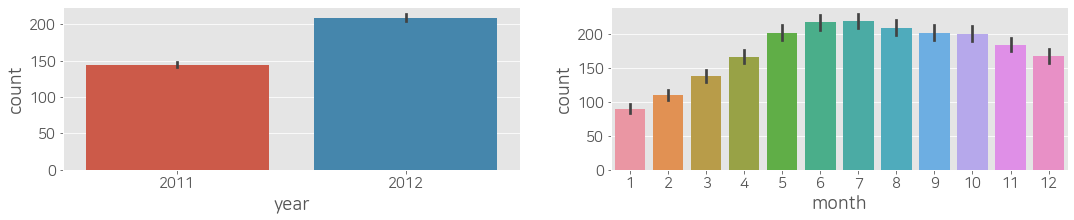

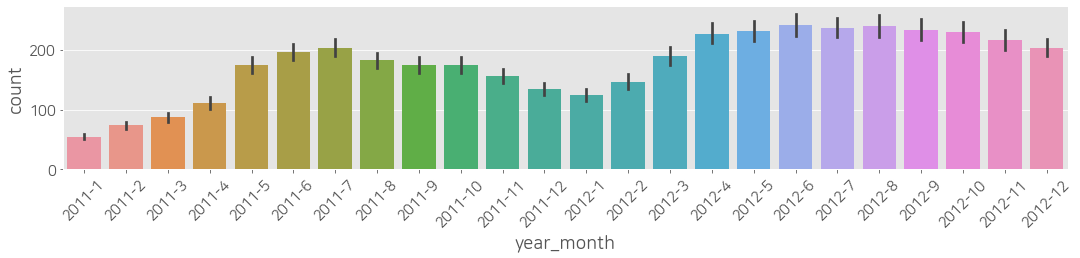

In [121]:
### 연도-월별 대여량 변화 ###
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18,3)
sns.barplot(data=train_Outliers,x='year',y='count',ax=ax1)
sns.barplot(data=train_Outliers,x='month',y='count',ax=ax2)

fig,ax = plt.subplots()
fig.set_size_inches(18,3)
plt.xticks(rotation=45)
sns.barplot(data=train_Outliers,x='year_month',y='count',ax=ax)

- 2011년과 2012년을 비교하면 2012년에 증가하는 추세다
- 11월부터 2월까지의 대여량이 낮으며 5월부터 8월 사이의 대여량이 높은 것으로 보아 겨울보다 **여름의 대여량이 더 많음**을 알 수 있다